In [12]:
from tensorflow.keras import datasets, utils

In [13]:
def make_data():
    #다운로드 경로 : 사용자 계정 디렉토리 하위의 .keras 디렉토리
    (x_tr, y_tr),(x_ts, y_ts) = datasets.cifar10.load_data()

    # one-hot
    y_tr = utils.to_categorical(y_tr, 10)
    y_ts = utils.to_categorical(y_ts, 10)

    # data normalization
    x_tr = x_tr.astype('float32')
    x_ts = x_ts.astype('float32')
    x_tr /= 255
    x_ts /= 255
    return (x_tr, y_tr), (x_ts, y_ts)

In [14]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Flatten, Dropout

def make_model():
    model = Sequential()
    # padding='same'
    model.add(Conv2D(32,(3,3),padding='same', input_shape=x_tr.shape[1:], activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    # decay 학습속도 감소
    opt = optimizers.RMSprop(learning_rate = 0.0001, decay=1e-6)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [15]:
a = isinstance(1, int)
b = isinstance(1.2, float)
print(a,b)

True True


In [16]:
import matplotlib.pyplot as plt

def plot_loss(hist, title=None):
    if not isinstance(hist, dict):
        history = hist.history
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])

    if title is not None:
        plt.title(title)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Test'], loc=0)

def plot_acc(hist, title=None):
    if not isinstance(hist, dict):
        history = hist.history
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])

    if title is not None:
        plt.title(title)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Test'], loc=0)


In [17]:
(x_tr, y_tr), (x_ts, y_ts) = make_data()

In [18]:
x_tr.shape   # 샘플수, 가로(W), 세로(H), 채널(흑백1, 세로3)

(50000, 32, 32, 3)

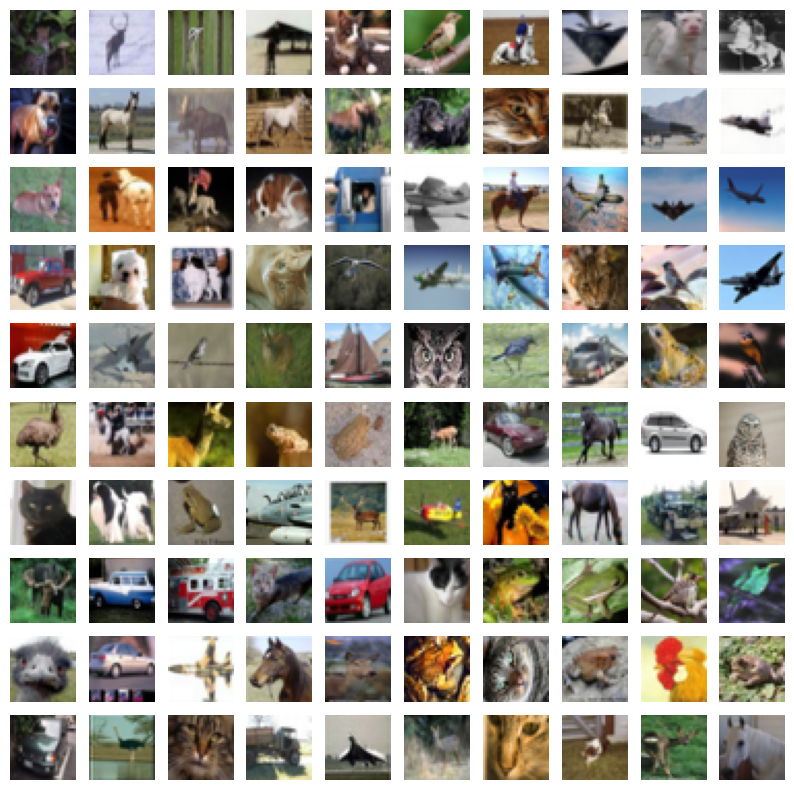

In [19]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes1 = plt.subplots(10,10,figsize=(10,10))
for j in range(10):
    for k in range(10):
        i = np.random.choice(range(len(x_tr)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(x_tr[i:i+1][0])

In [20]:
model = make_model()

In [22]:
import tensorflow as tf

with tf.device('/GPU:0'):
    history=model.fit(x_tr, y_tr,epochs=3,batch_size=32,validation_split=0.2)

Epoch 1/3
1250/1250 [==============================] - 16s 11ms/step - loss: 1.7804 - accuracy: 0.3565 - val_loss: 1.5299 - val_accuracy: 0.4545
Epoch 2/3
1250/1250 [==============================] - 13s 10ms/step - loss: 1.4443 - accuracy: 0.4830 - val_loss: 1.3325 - val_accuracy: 0.5388
Epoch 3/3
1250/1250 [==============================] - 13s 10ms/step - loss: 1.3106 - accuracy: 0.5345 - val_loss: 1.2582 - val_accuracy: 0.5507


In [23]:
#성능 평가
performance_test=model.evaluate(x_ts,y_ts,batch_size=128)
print(performance_test)



79/79 [==============================] - 1s 7ms/step - loss: 1.2426 - accuracy: 0.5554
[1.2425917387008667, 0.555400013923645]


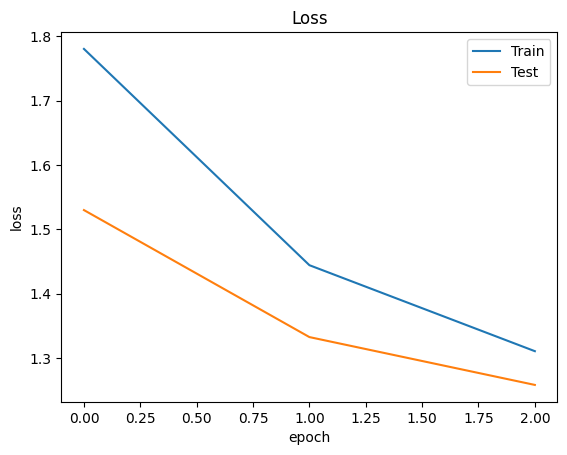

In [24]:
import matplotlib
plot_loss(history,"Loss")
plt.show()



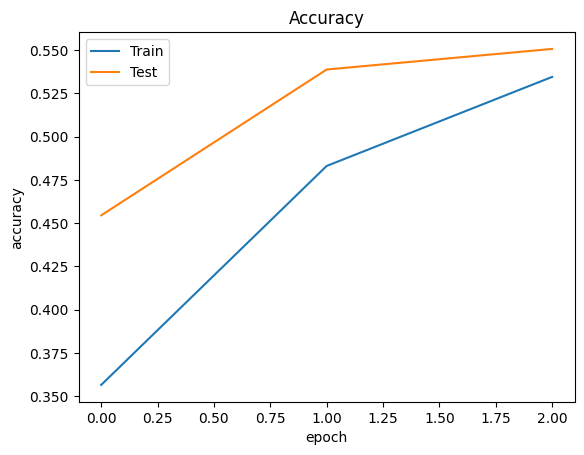

In [25]:
plot_acc(history, 'Accuracy')
plt.show()


In [26]:

from sklearn.metrics import confusion_matrix
y_pred=model.predict(x_ts,verbose=1)
y_pred=np.argmax(y_pred, axis=1)
confusion_matrix(np.argmax(y_ts,axis=1),y_pred)



313/313 [==============================] - 1s 2ms/step


array([[533,  51,  92,  15,  18,   2,  15,  24, 211,  39],
       [ 23, 764,  13,   5,   7,   1,  11,  28,  56,  92],
       [ 67,  17, 522,  54, 121,  31,  44,  95,  35,  14],
       [ 16,  27, 138, 356, 131,  79,  59, 141,  29,  24],
       [ 20,  12, 195,  48, 474,  14,  43, 171,  22,   1],
       [ 11,   7, 154, 201,  84, 293,  32, 186,  23,   9],
       [  5,  18, 105,  61, 151,   4, 567,  57,  17,  15],
       [ 14,   6,  45,  47,  65,  28,  10, 746,  14,  25],
       [ 54,  82,  31,  11,   9,   1,   4,  19, 758,  31],
       [ 31, 221,  25,  12,  11,   4,  24,  57,  74, 541]], dtype=int64)

In [27]:
model.save('Data/result/cifar.h5')